In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set(style="whitegrid")
%matplotlib inline

In [167]:
import pyspark

In [168]:
data = pd.read_csv("Dataset\Dataset.csv")

data.head(10)


,age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [169]:
# Manually set column names
column_names = ['age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week', 'Native_Country', 'Income']

# Assign column names to the DataFrame
data.columns = column_names

# Display the updated DataFrame
data.head(10)


,age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   Workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Education_Num   48842 non-null  float64
 5   Marital_Status  48842 non-null  object 
 6   Occupation      48842 non-null  object 
 7   Relationship    48842 non-null  object 
 8   Race            48842 non-null  object 
 9   Sex             48842 non-null  object 
 10  Capital_Gain    48842 non-null  float64
 11  Capital_Loss    48842 non-null  float64
 12  Hours_per_Week  48842 non-null  float64
 13  Native_Country  48842 non-null  object 
 14  Income          48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


In [171]:
data.describe()

,age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [172]:
data

,age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,64.0,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
48839,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
48840,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
48841,35.0,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


pip install data_exploration

Discrete Variable Barplot

C:\Users\Dell\AppData\Local\Temp\ipykernel_13896\327177249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=workclass_counts.index, x=workclass_counts.values, palette='viridis')


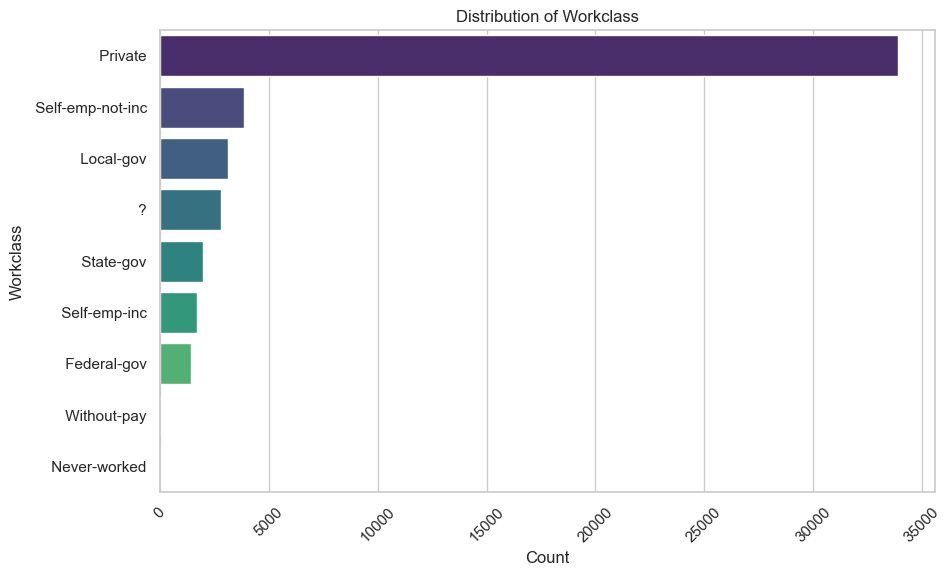

In [173]:
# Count the occurrences of each category in the "Workclass" column
workclass_counts = data['Workclass'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=workclass_counts.index, x=workclass_counts.values, palette='viridis')

# Set labels and title
plt.ylabel('Workclass')
plt.xlabel('Count')
plt.title('Distribution of Workclass')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13896\2753986053.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')


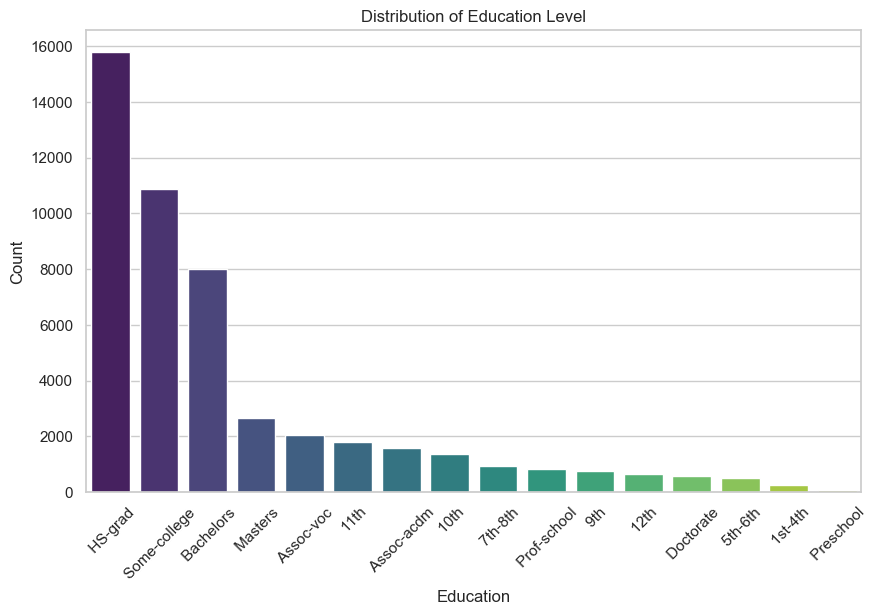

In [174]:
# Count the occurrences of each category in the "Workclass" column
workclass_counts = data['Education'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education Level')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13896\3905324086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')


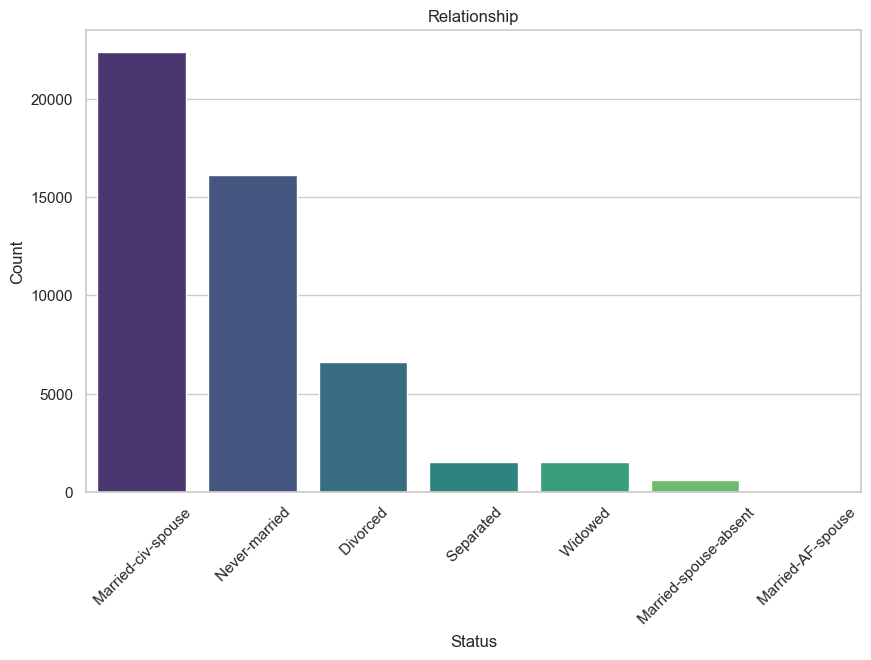

In [175]:
# Count the occurrences of each category in the "Workclass" column
workclass_counts = data['Marital_Status'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Relationship')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13896\4283542575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')


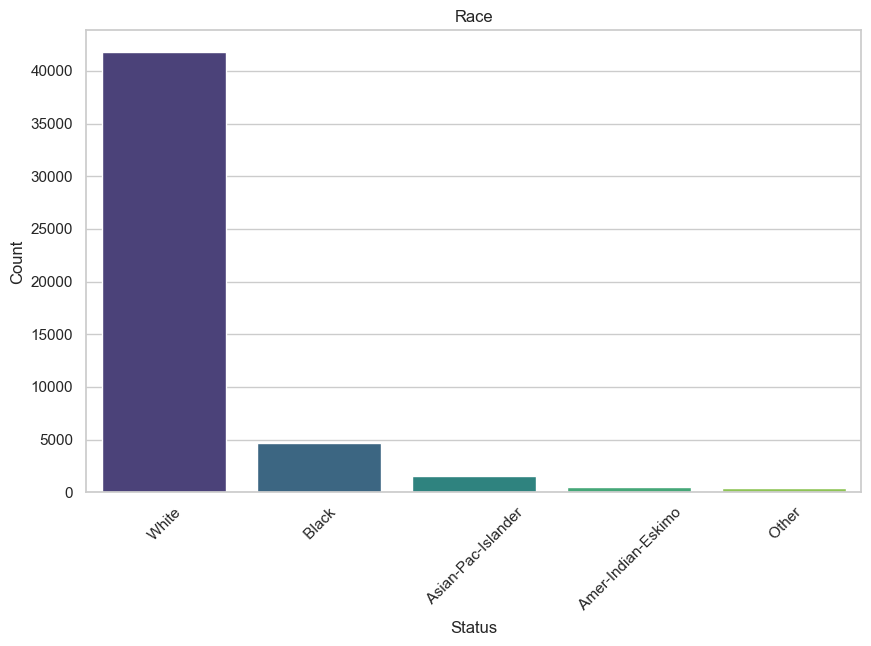

In [176]:
# Count the occurrences of each category in the "Workclass" column
workclass_counts = data['Race'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Race')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13896\1755400986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=workclass_counts.index, x=workclass_counts.values, palette='viridis')


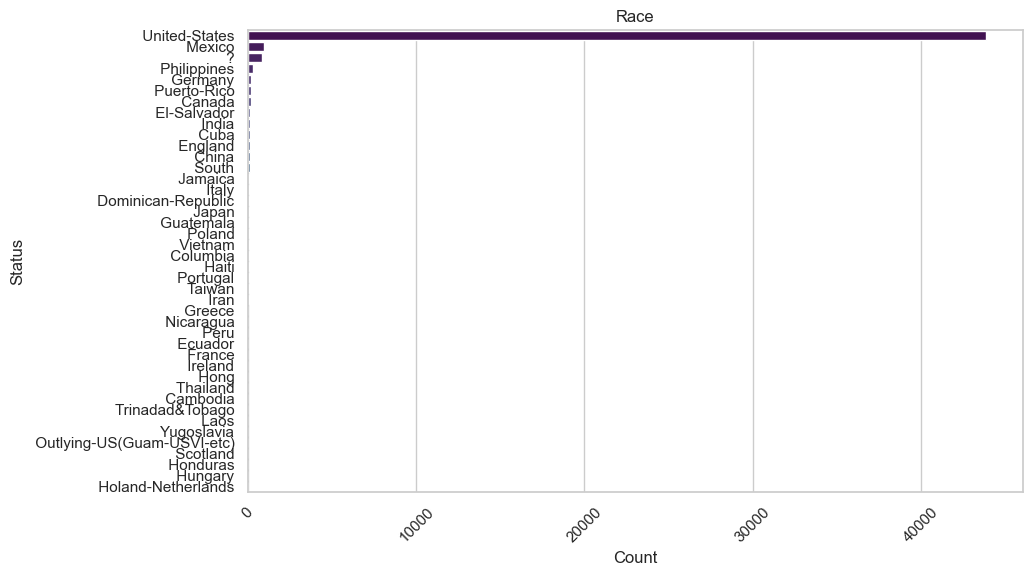

In [177]:
# Count the occurrences of each category in the "Workclass" column
workclass_counts = data['Native_Country'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=workclass_counts.index, x=workclass_counts.values, palette='viridis')

# Set labels and title
plt.ylabel('Status')
plt.xlabel('Count')
plt.title('Race')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

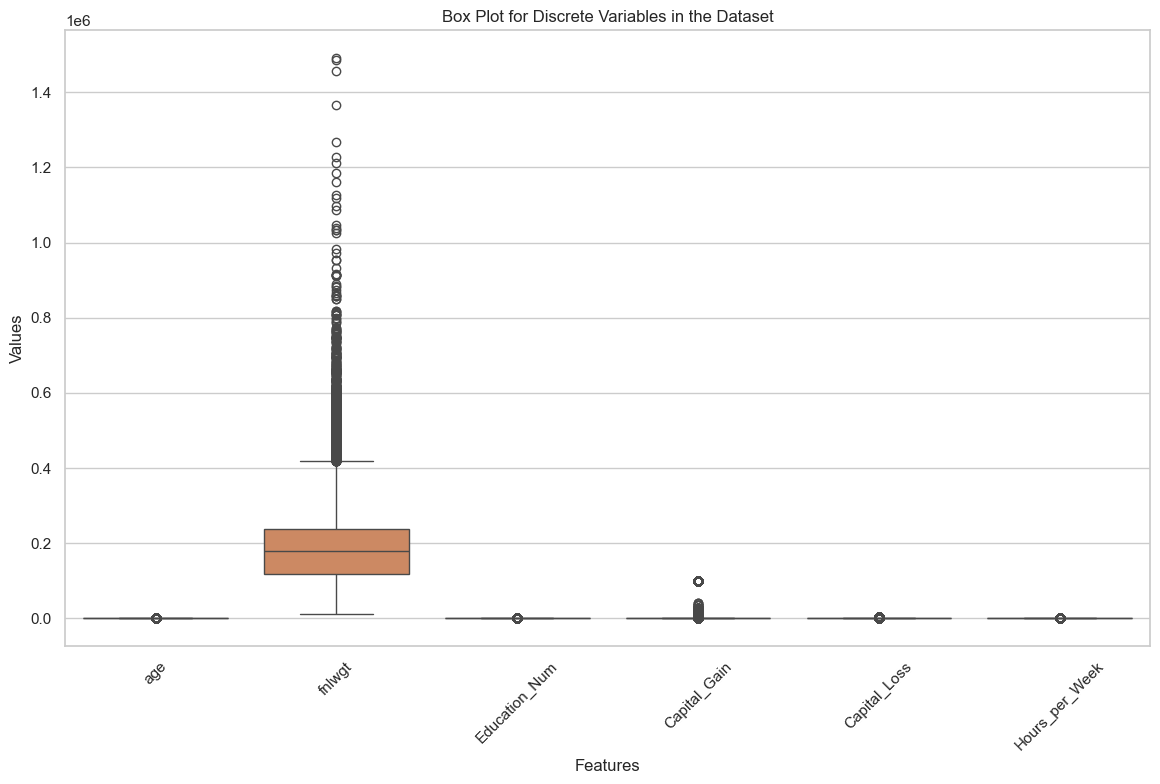

In [178]:
# Create a box plot for the entire dataset
plt.figure(figsize=(14, 8))
sns.boxplot(data=data)

# Set labels and title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot for Discrete Variables in the Dataset')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
#('age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 'Hours-per-Week', 'Native-Country', 'Income')

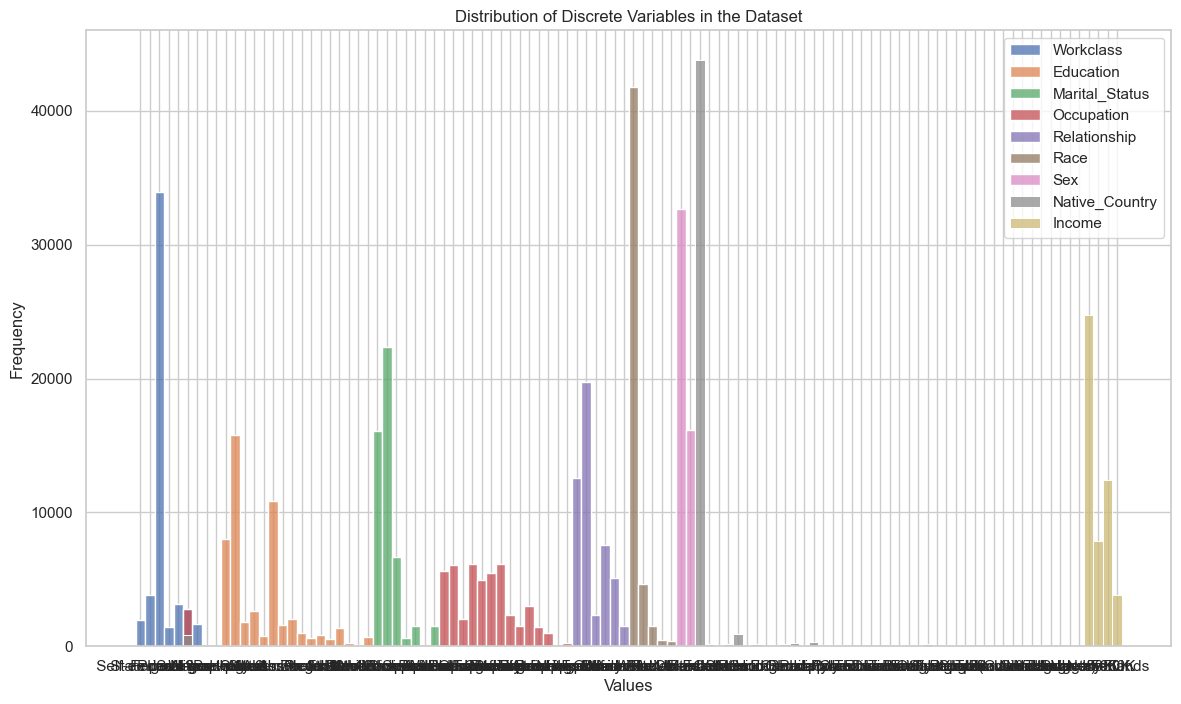

In [179]:
# Select only the discrete variables from the dataset
discrete_columns = data.select_dtypes(include=['int64', 'object']).columns

# Create a distribution plot for each discrete variable
plt.figure(figsize=(14, 8))
for column in discrete_columns:
    sns.histplot(data[column], kde=False, bins=20, label=column)

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Discrete Variables in the Dataset')

# Add legend for better readability
plt.legend()

# Show the plot
plt.show()

# Select only numeric columns or encode categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
df_numeric = data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title
plt.title('Correlation Plot for the Numeric Variables in the Dataset')

# Show the plot
plt.show()

In [180]:
print(data.head())

    age          Workclass    fnlwgt   Education  Education_Num  \
0  39.0          State-gov   77516.0   Bachelors           13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38.0            Private  215646.0     HS-grad            9.0   
3  53.0            Private  234721.0        11th            7.0   
4  28.0            Private  338409.0   Bachelors           13.0   

        Marital_Status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_Gain  Capital_Loss  Hours_per_Week  Native_Country  Income  
0        2174.0           0.0            40.0   Un

In [181]:
filtered_data = data[data['Workclass'].str.strip() == '']
# Print the filtered rows
print(filtered_data)
#data.filter(data['Workclass'] == 'Private').show()

Empty DataFrame
Columns: [age, Workclass, fnlwgt, Education, Education_Num, Marital_Status, Occupation, Relationship, Race, Sex, Capital_Gain, Capital_Loss, Hours_per_Week, Native_Country, Income]
Index: []


In [182]:
# Check for missing values in the dataset
missing_data = data.isnull().sum().reset_index()
missing_data.columns = ['Feature', 'Missing Values']

# Display missing data as a table
print(missing_data)

           Feature  Missing Values
0              age               1
1        Workclass               1
2           fnlwgt               1
3        Education               1
4    Education_Num               1
5   Marital_Status               1
6       Occupation               1
7     Relationship               1
8             Race               1
9              Sex               1
10    Capital_Gain               1
11    Capital_Loss               1
12  Hours_per_Week               1
13  Native_Country               1
14          Income               1


In [183]:
pd.Series(data.fnlwgt.unique()).sort_values()

13258      12285.0
28440      13492.0
19003      13769.0
26085      13862.0
18219      14878.0
           ...    
13044    1366120.0
13898    1455435.0
11597    1484705.0
25230    1490400.0
28523          NaN
Length: 28524, dtype: float64

In [184]:
pd.Series(data.Capital_Gain.unique()).sort_values()

1          0.0
80       114.0
61       401.0
19       594.0
60       914.0
        ...   
48     27828.0
9      34095.0
90     41310.0
38     99999.0
123        NaN
Length: 124, dtype: float64

In [185]:
print(data.shape)

(48843, 15)


In [186]:
# Function to remove outliers based on IQR
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
    
    # Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print("lower_bound ",lower_bound)
print("upper_bound ",upper_bound)


    # Remove outliers
  #  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
  #  return df_no_outliers

# Specify the columns for which you want to remove outliers
#columns_to_remove_outliers = ['fnlwgt']

# Apply the remove_outliers function to each specified column
#for column in columns_to_remove_outliers:
 #   df = remove_outliers(df, column)

# The DataFrame df now contains the data with outliers removed

Q1  117550.5
Q3  237642.0
IQR  120091.5
lower_bound  -62586.75
upper_bound  417779.25


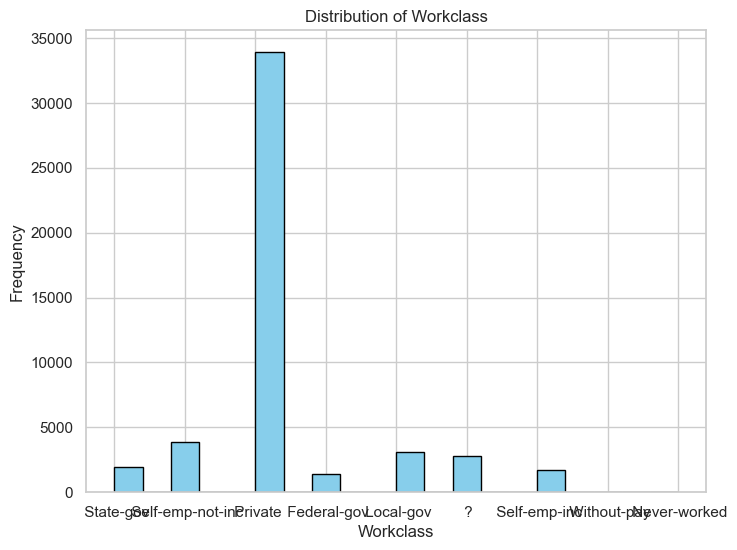

In [187]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'Workclass'  # You can change this to the column you want to visualize

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(data[column_name].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [188]:
#'age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week', 'Native_Country', 'Income'

In [189]:
data['age'].value_counts()

age
36.0    1348
35.0    1337
33.0    1335
23.0    1329
31.0    1325
        ... 
88.0       6
85.0       5
87.0       3
89.0       2
86.0       1
Name: count, Length: 74, dtype: int64

In [190]:
data['Workclass'].value_counts()

Workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [191]:
data['Education'].value_counts()

Education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [192]:
data['Marital_Status'].value_counts()

Marital_Status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [193]:
data['Occupation'].value_counts()

Occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [194]:
data['Relationship'].value_counts()

Relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [195]:
data['Race'].value_counts()

Race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [196]:
data['Native_Country'].value_counts()

Native_Country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [197]:
data['Sex'].value_counts()

Sex
Male      32650
Female    16192
Name: count, dtype: int64

In [198]:
data['Income'].value_counts()

Income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [199]:
data['Income'] = data['Income'].str.replace(".", "")

In [200]:
data['Income'].value_counts()

Income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [201]:
data.head()

,age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [202]:
from sklearn.preprocessing import LabelEncoder

In [203]:
le=LabelEncoder()

In [204]:
#data['le_age']=le.fit_transform(data['age'])
data['le_workclass']=le.fit_transform(data['Workclass'])
#data['le_fnlwgt']=le.fit_transform(data['fnlwgt'])
data['le_education']=le.fit_transform(data['Education'])
#data['le_edu_num']=le.fit_transform(data['Education_Num'])
data['le_marital_status']=le.fit_transform(data['Marital_Status'])
data['le_occupation']=le.fit_transform(data['Occupation'])
data['le_relationship']=le.fit_transform(data['Relationship'])
data['le_race']=le.fit_transform(data['Race'])
data['le_sex']=le.fit_transform(data['Sex'])
#data['le_capital_gain']=le.fit_transform(data['Capital_Gain'])
#data['le_capital_loss']=le.fit_transform(data['Capital_Loss'])
#data['le_working_hours']=le.fit_transform(data['Hours_per_Week'])
data['le_country']=le.fit_transform(data['Native_Country'])
data['le_income']=le.fit_transform(data['Income'])

In [205]:
data.describe()

,age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week,le_workclass,le_education,le_marital_status,le_occupation,le_relationship,le_race,le_sex,le_country,le_income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48843.000000,48843.000000,48843.000000,48843.000000,48843.000000,48843.000000,48843.000000,48843.000000,48843.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,3.870544,10.288537,2.618840,6.577872,1.443380,3.668079,0.668509,36.749463,0.239318
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,1.464403,3.874539,1.507817,4.230638,1.602267,0.845999,0.470797,7.775300,0.426719
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,9.000000,16.000000,7.000000,15.000000,6.000000,5.000000,2.000000,42.000000,2.000000


In [206]:
new=["age","fnlwgt","Education_Num","Capital_Gain","Capital_Loss","Hours_per_Week","le_workclass","le_education","le_marital_status","le_occupation","le_relationship","le_race","le_sex","le_country","le_income"]
data2=data[new]
data2

,age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week,le_workclass,le_education,le_marital_status,le_occupation,le_relationship,le_race,le_sex,le_country,le_income
0,39.0,77516.0,13.0,2174.0,0.0,40.0,7,9,4,1,1,4,1,39,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,6,9,2,4,0,4,1,39,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,4,11,0,6,1,4,1,39,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,4,1,2,6,0,2,1,39,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,4,9,2,10,5,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,64.0,321403.0,9.0,0.0,0.0,40.0,0,11,6,0,2,2,1,39,0
48839,38.0,374983.0,13.0,0.0,0.0,50.0,4,9,2,10,0,4,1,39,0
48840,44.0,83891.0,13.0,5455.0,0.0,40.0,4,9,0,1,3,1,1,39,0
48841,35.0,182148.0,13.0,0.0,0.0,60.0,5,9,2,4,0,4,1,39,1


In [207]:
correlation_matrix = data2.corr()
print(correlation_matrix)

                        age    fnlwgt  Education_Num  Capital_Gain  \
age                1.000000 -0.076628       0.030940      0.077229   
fnlwgt            -0.076628  1.000000      -0.038761     -0.003706   
Education_Num      0.030940 -0.038761       1.000000      0.125146   
Capital_Gain       0.077229 -0.003706       0.125146      1.000000   
Capital_Loss       0.056944 -0.004366       0.080972     -0.031441   
Hours_per_Week     0.071558 -0.013519       0.143689      0.082157   
le_workclass       0.017526 -0.016546       0.055918      0.036044   
le_education      -0.015058 -0.022570       0.359668      0.028928   
le_marital_status -0.263978  0.029851      -0.069992     -0.043969   
le_occupation     -0.014259  0.000860       0.112265      0.024163   
le_relationship   -0.263383  0.009092      -0.090534     -0.056510   
le_race            0.028421 -0.027062       0.029239      0.011581   
le_sex             0.088120  0.027739       0.009328      0.047094   
le_country        -0

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                48842 non-null  float64
 1   Workclass          48842 non-null  object 
 2   fnlwgt             48842 non-null  float64
 3   Education          48842 non-null  object 
 4   Education_Num      48842 non-null  float64
 5   Marital_Status     48842 non-null  object 
 6   Occupation         48842 non-null  object 
 7   Relationship       48842 non-null  object 
 8   Race               48842 non-null  object 
 9   Sex                48842 non-null  object 
 10  Capital_Gain       48842 non-null  float64
 11  Capital_Loss       48842 non-null  float64
 12  Hours_per_Week     48842 non-null  float64
 13  Native_Country     48842 non-null  object 
 14  Income             48842 non-null  object 
 15  le_workclass       48843 non-null  int32  
 16  le_education       488

In [209]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                48842 non-null  float64
 1   fnlwgt             48842 non-null  float64
 2   Education_Num      48842 non-null  float64
 3   Capital_Gain       48842 non-null  float64
 4   Capital_Loss       48842 non-null  float64
 5   Hours_per_Week     48842 non-null  float64
 6   le_workclass       48843 non-null  int32  
 7   le_education       48843 non-null  int32  
 8   le_marital_status  48843 non-null  int32  
 9   le_occupation      48843 non-null  int32  
 10  le_relationship    48843 non-null  int32  
 11  le_race            48843 non-null  int32  
 12  le_sex             48843 non-null  int32  
 13  le_country         48843 non-null  int32  
 14  le_income          48843 non-null  int32  
dtypes: float64(6), int32(9)
memory usage: 3.9 MB


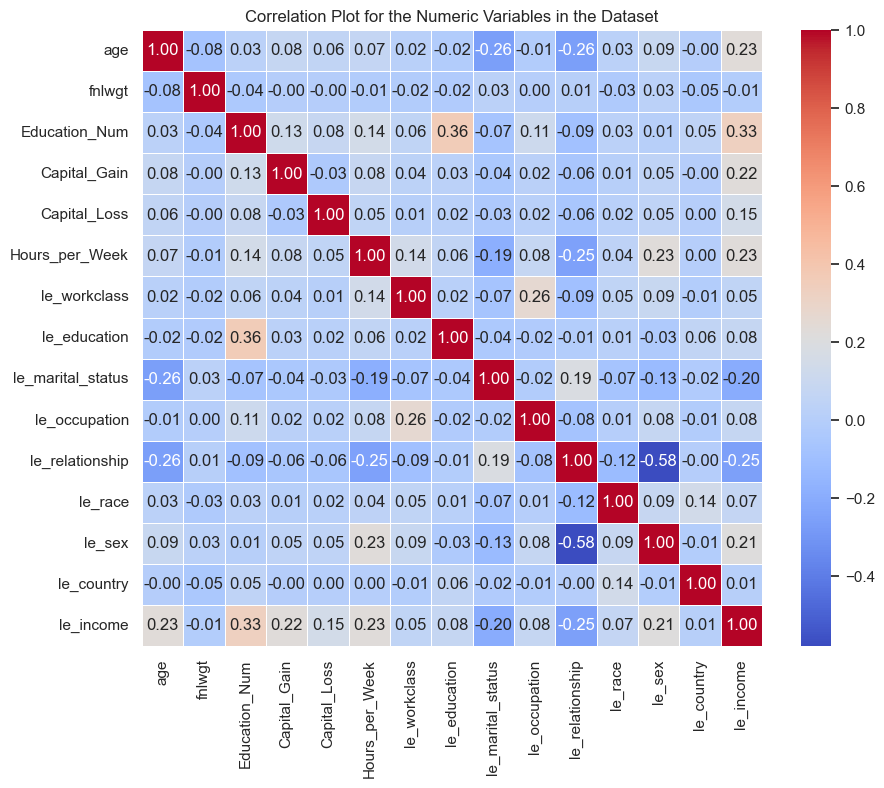

In [210]:
# Select only numeric columns or encode categorical columns
numeric_columns = data2.select_dtypes(include=['number']).columns
df_numeric = data2[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title
plt.title('Correlation Plot for the Numeric Variables in the Dataset')

# Show the plot
plt.show()

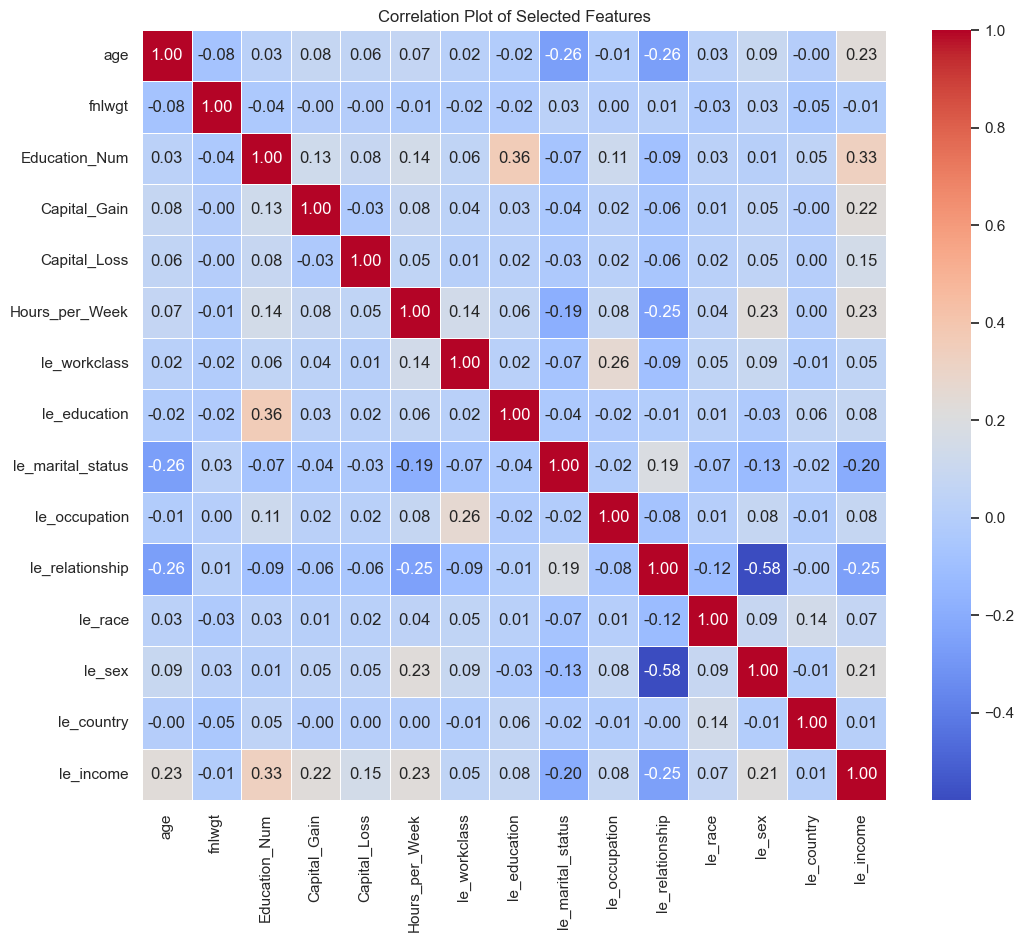

In [211]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot of Selected Features')
plt.show()

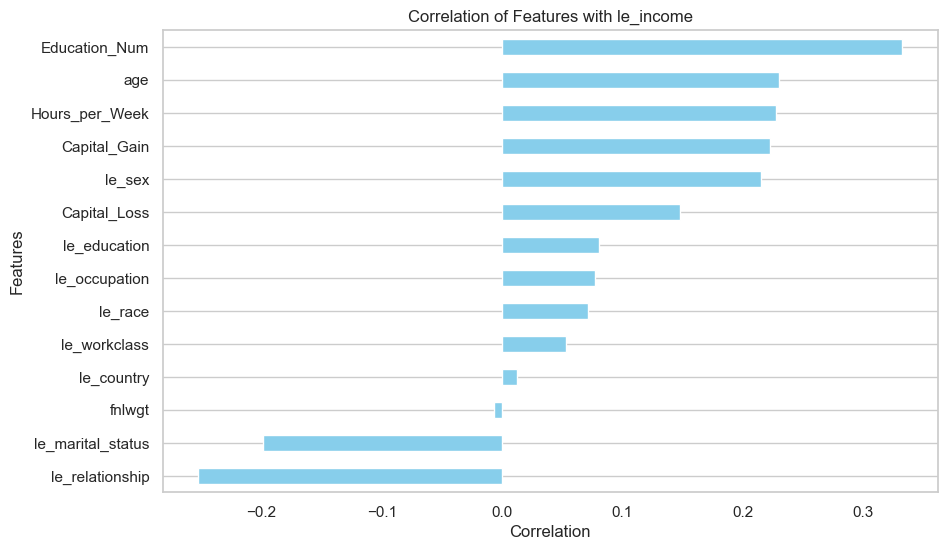

In [212]:
# Calculate correlation matrix
correlation_matrix = data2.corr()

# Extract correlation of le_income with other features
income_correlation = correlation_matrix['le_income'].drop('le_income')

# Plot
plt.figure(figsize=(10, 6))
income_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with le_income')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()
